In [24]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [25]:
import pandas as pd
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Handling imbalanced data:
under sampling : used for haddling the fraud data.simply takes original data equal size of spam data and apply algo on those data.and rest of original data gona skipped

In [28]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [29]:
#ratio#
747/4825

0.15481865284974095

In [30]:
# making new dataframe for handdling imbalanced data using under sampling technique #

In [31]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [32]:
df_spam = df[df['Category']=='spam']
df_spam.shape[0]

747

In [33]:
#smaple(): ramdomely returns no of rows you want.#
df_ham_undersample = df_ham.sample(df_spam.shape[0])
df_ham_undersmaple.shape

(747, 2)

In [34]:
df_balanced = pd.concat([df_spam,df_ham_undersample])

# both equla size of spam and ham data.#
df_balanced.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham          747    738                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham         3  
spam        4

In [35]:
df_balanced['Category'].value_counts()

Category
spam    747
ham     747
Name: count, dtype: int64

In [36]:
df_balanced.sample(5)

,Category,Message
803,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile ...
5468,spam,URGENT! Last weekend's draw shows that you hav...
591,spam,For ur chance to win a £250 wkly shopping spre...
5138,ham,Yup... I havent been there before... You want ...
5460,spam,December only! Had your mobile 11mths+? You ar...


In [37]:
# one hot_encoding for converting some simple text into binary , us we know ml understand number#
df_balanced.Category.replace({
    'ham': 0,
    'spam':1
},inplace=True)

C:\Users\mdhar_hxm\AppData\Local\Temp\ipykernel_12356\3562692811.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_balanced.Category.replace({
C:\Users\mdhar_hxm\AppData\Local\Temp\ipykernel_12356\3562692811.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_balanced.Category.replace({


In [38]:
df_balanced.sample(10)

,Category,Message
2100,1,"SMS SERVICES. for your inclusive text credits,..."
1767,1,SMS AUCTION You have won a Nokia 7250i. This i...
4696,1,URGENT! Your Mobile No 07808726822 was awarded...
1127,0,Not tonight mate. Catching up on some sleep. T...
5204,0,How come she can get it? Should b quite diff t...
3072,0,Apart from the one i told you about yesterday?
5497,1,"SMS SERVICES. for your inclusive text credits,..."
5276,0,Dunno leh cant remember mayb lor. So wat time ...
65,1,"As a valued customer, I am pleased to advise y..."
3742,1,2/2 146tf150p


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_balanced.Message
y = df_balanced.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_train.head(4)

3852               We have all rounder:)so not required:)
3272    You have 1 new voicemail. Please call 08719181...
4295    Kit Strip - you have been billed 150p. Netcoll...
1845             Da is good good player.why he is unsold.
Name: Message, dtype: object

In [42]:
#url of BERT preprocess, encode model#
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [45]:
def get_sentence_embeding(sentences):
    bert_preprocess_text = bert_preprocess(sentences)
    return bert_encoder(bert_preprocess_text)['pooled_output']
    
get_sentence_embeding([
    '599$ discount. hurry up',
    'bhavin, are you up for a volleybal game tomorrow'
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.73174274, -0.41783795, -0.7118793 , ..., -0.4725709 ,
        -0.71133286,  0.8507893 ],
       [-0.88650733, -0.57973194, -0.9656894 , ..., -0.88339543,
        -0.7252486 ,  0.8797386 ]], dtype=float32)>

In [46]:
# explore some another sentences..#

e = get_sentence_embeding([
    'banana',
    'mango',
    'apple',
    'jack fruit',
    'lichchi',
    'elon must',
    'bill gates'
])
e

<tf.Tensor: shape=(7, 768), dtype=float32, numpy=
array([[-0.76069164, -0.14219375,  0.4960462 , ...,  0.4216532 ,
        -0.5322139 ,  0.8031217 ],
       [-0.7128862 , -0.15463911,  0.38401607, ...,  0.3527872 ,
        -0.5099134 ,  0.7347411 ],
       [-0.8196459 , -0.29609635,  0.20951647, ...,  0.25593287,
        -0.5874301 ,  0.84345585],
       ...,
       [-0.9032091 , -0.2872112 , -0.43142992, ..., -0.22150786,
        -0.59439015,  0.7496503 ],
       [-0.8986821 , -0.40383032, -0.6604238 , ..., -0.38264084,
        -0.7263477 ,  0.9031895 ],
       [-0.78544384, -0.299497  ,  0.41027313, ...,  0.5222541 ,
        -0.4957357 ,  0.8150751 ]], dtype=float32)>

In [47]:
#cosine_sismilarity = it majore how closed two vectores are(when both vector having smae direction and angle is less between tham then cosin_similarity is close to 1)
from sklearn.metrics.pairwise import cosine_similarity
#cosine_similarity([e[0]], [e[1]])
cosine_similarity([e[0]], [e[4]])

array([[0.86021495]], dtype=float32)

# creating tensorflow model
there are two way 1: we used in every deep learning code called Sequential model
2: fuction model .we used in this code function modek for tensorflow 

In [49]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [51]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [52]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
32/32 [==============================] - 352s 11s/step - loss: 0.6738 - accuracy: 0.5660 - precision: 0.5688 - recall: 0.5598
Epoch 2/2
32/32 [==============================] - 351s 11s/step - loss: 0.5429 - accuracy: 0.7600 - precision: 0.7848 - recall: 0.7191


In [53]:
model.evaluate(X_test,y_test)

16/16 [==============================] - 75s 5s/step - loss: 0.5028 - accuracy: 0.8138 - precision: 0.9322 - recall: 0.6735


[0.5028213262557983,
 0.8137651681900024,
 0.9322034120559692,
 0.6734693646430969]

In [54]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

16/16 [==============================] - 109s 7s/step


In [55]:
import numpy as np
y_predicted = np.where(y_predicted >0.5, 1, 0)
y_predicted

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[237,  12],
       [ 80, 165]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

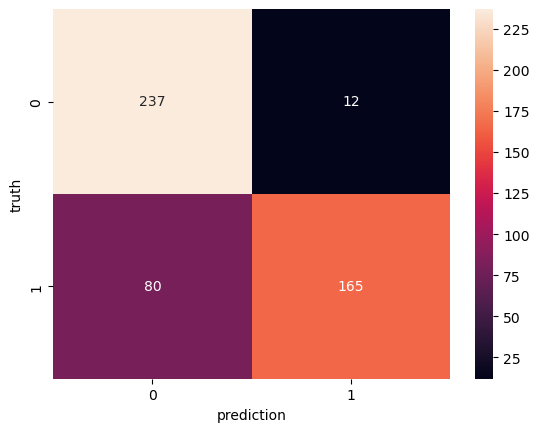

In [59]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('truth')

In [60]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       249
           1       0.93      0.67      0.78       245

    accuracy                           0.81       494
   macro avg       0.84      0.81      0.81       494
weighted avg       0.84      0.81      0.81       494



In [61]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 2s 2s/step


array([[0.5618317 ],
       [0.5194635 ],
       [0.56305736],
       [0.29082087],
       [0.23636156]], dtype=float32)